# DATA WRANKLING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# head the Airinb Data

df = pd.read_excel(r"C:\Users\anjal\Downloads\1730285881-Airbnb_Open_Data.xlsx")

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [6]:
df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


## Problems Identified within the Data
- 541 duplicated Records where found in the Data

- Insufficient information were recorded for the house rules and Licence columns.

- Dollar signs and commas recorded along with the values for price and service fee

- The currency for price and service fee were not added to the column's titles

- Missing values in some records

- Columns like the price, service fee, id, host id, last review, Construction year are assigned wrong datatypes

- In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records

- Some outliers were identified in the availability 365 column.

# Data Cleaning

In [8]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop 'house_rules' and 'license' columns if they exist
cols_to_drop = [col for col in ['house_rules', 'license'] if col in df.columns]
if cols_to_drop:
    df.drop(cols_to_drop, axis=1, inplace=True)

# Remove dollar signs and commas from 'price' and 'service fee' columns
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)

# Rename columns to include dollar sign
df.rename(columns={
    'price': 'price_$',
    'service fee': 'Service_fee_$'
}, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Convert data types
df['price_$'] = df['price_$'].astype(float)
df['Service_fee_$'] = df['Service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

# Correct spelling 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

# Remove outliers in 'availability 365'
df = df[df['availability 365'] <= 500]

In [9]:
df.duplicated().value_counts()

False    83796
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83796 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83796 non-null  object        
 1   NAME                            83796 non-null  object        
 2   host id                         83796 non-null  object        
 3   host_identity_verified          83796 non-null  object        
 4   host name                       83796 non-null  object        
 5   neighbourhood group             83796 non-null  object        
 6   neighbourhood                   83796 non-null  object        
 7   lat                             83796 non-null  float64       
 8   long                            83796 non-null  float64       
 9   country                         83796 non-null  object        
 10  country code                    83796 non-null  object        
 11  instan

In [11]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,Service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83796.000000,83796.000000,83796.000000,83796.000000,83596.000000,83567.000000,83796.000000,83796.000000,83796,83796.000000,83796.000000,83796.000000,83796.000000
mean,40.727353,-73.948502,0.497721,2012.489522,626.342457,125.232436,7.436775,32.226622,2019-06-09 15:15:53.229271296,1.375596,3.278820,7.049907,141.759153
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687660,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721335,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762580,-73.930790,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056317,0.050338,0.499998,5.760523,331.809388,66.357813,28.122911,51.897899,NaN,1.749446,1.283724,29.568700,133.408285


### what are the different types of property types in the dataset?

In [ ]:
#what are the different types of property types in the dataset  
property_types = df['room type'].value_counts().to_frame()
property_types


,count
room type,
Entire home/apt,44367
Private room,37664
Shared room,1655
Hotel room,110


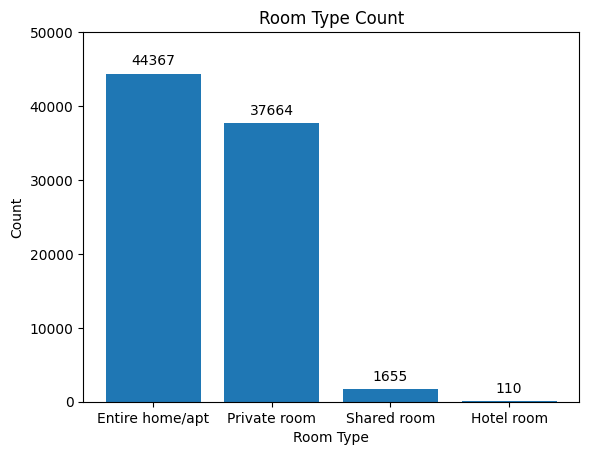

In [13]:
#Room type count plotted on the barchart
room_type_bar = plt.bar(property_types.index, property_types.loc[:, "count"]);
plt.bar_label(room_type_bar, labels=property_types.loc[:, "count"], padding=4);
plt.ylim(0, 50000);
plt.xlabel("Room Type");
plt.ylabel("Count");
plt.title("Room Type Count");
plt.show()

The Airnb open dataset reveals four distinct property or room types.These categories comprise:
- Entire hime/apt
- private room
- Shared room
- Hotel room

Notably, the barchart illustrates that Entire home/apt dominates the dataset with 44,367 occurences, followed by private room with 37,664 occurrences. Shared room and Hotel room trail behind with 1655 and 110 occurrence, Respectively.

### which neighbourhood group has the highest number of listings?

In [14]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Brooklyn,34780
Manhattan,34735
Queens,11184
Bronx,2276
Staten Island,821


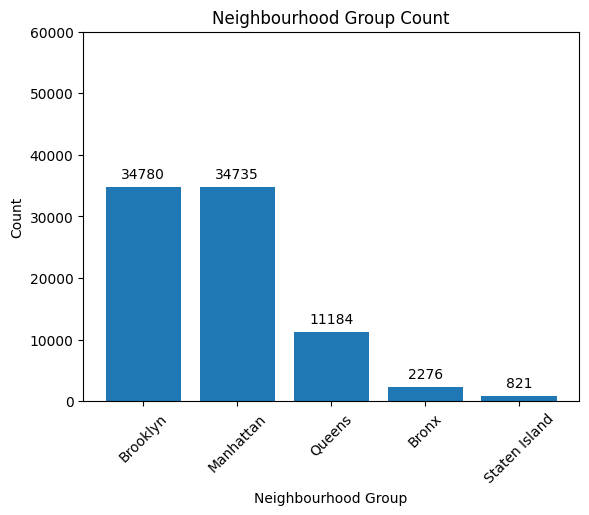

In [15]:
#which neighbourhood group has the highest number of listings?
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels=hood_group.loc[:, "count"], padding=4);
plt.ylim(0, 60000);     
plt.xlabel("Neighbourhood Group");
plt.ylabel("Count");   
plt.xticks(rotation=45); 
plt.title("Neighbourhood Group Count");
plt.show()

The dataset contains five different neighborhood groups, namely Brooklyn, Manhattan, Queens, Bronx, and Staten Island. According to the barcharrt, Brooklyn has the highest number of listings with 34780, followed closly by Manhattan with 34,735.

### which neighborhoods group have the highest average prices for AIrnb listing?

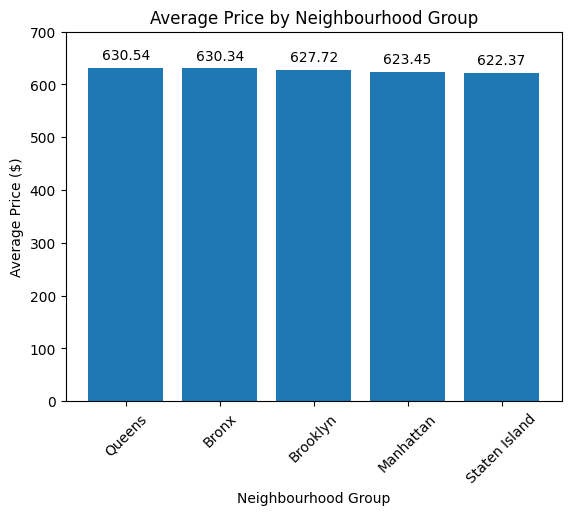

In [16]:
avg_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:, "price_$"]);
plt.bar_label(avg_price_bar, labels=round(avg_price.loc[:, "price_$"], 2),label_type='edge', padding=4);
plt.ylim(0, 700);     
plt.xlabel("Neighbourhood Group");  
plt.ylabel("Average Price ($)");   
plt.xticks(rotation=45);
plt.title("Average Price by Neighbourhood Group");

Among the five identified neighborhood groups in the dataset, Queens boasts the highest average listing price at 630.54 USD, closely trained by the Bronx listing price of 630.34 USD. Conversely, Staten Island records the lowest average listing price at 622.37 USD.

### Is there a relationship between the construction year of property and price?

Text(0.5, 1.0, 'Average Price by Construction Year')

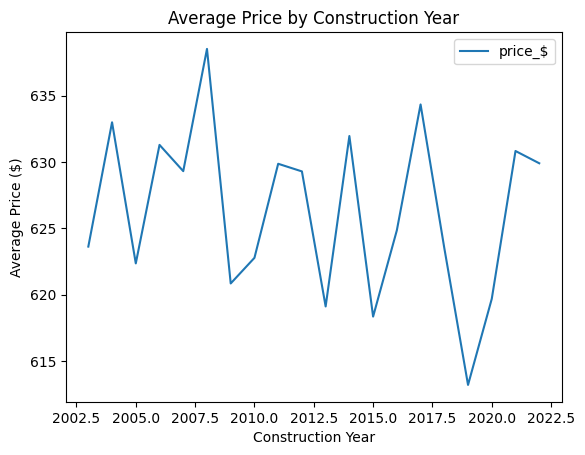

In [17]:
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel("Construction Year")
plt.ylabel("Average Price ($)") 
plt.title("Average Price by Construction Year")

The line plot depicting teh construction year of properties versus teh average price per property reveals a noticeable downward trend in prices as the construction years progress. The pattern demostrates decresing lows and highs, suggesting an overall decline in property prices as time progress.

### Who are the top 10 hostes by calculated host listing count?

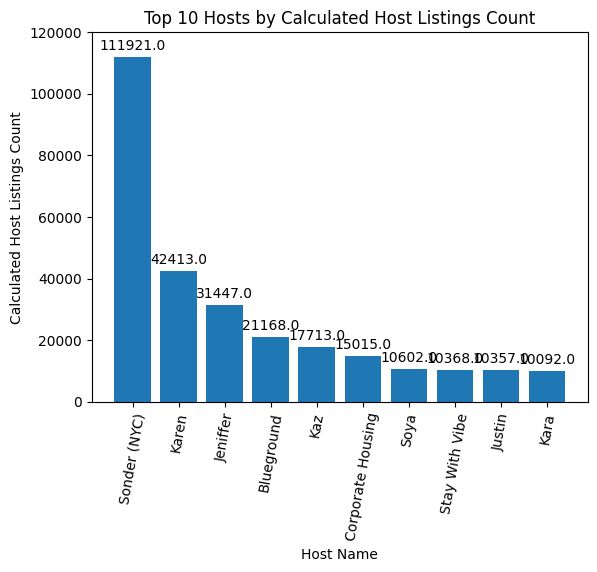

In [18]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, "calculated host listings count"]);
plt.bar_label(hosts_bar, labels=hosts.loc[:, "calculated host listings count"], label_type='edge', padding=3);
plt.xlabel("Host Name");
plt.ylabel("Calculated Host Listings Count");
plt.xticks(rotation=80);
plt.ylim(0, 120000);
plt.title("Top 10 Hosts by Calculated Host Listings Count");
plt.show()
                   

The bar chart above illustrates the top 10 hosts based on the calculated listing count, with Sonder(NYC) notably leading with 111,921 listings.

Subsequently, the other hosts follow in descending order.
- karen at second position with 42413 hosts
- jennifer at third position with 31447 hosts
- Blueground at fourth position with 21168 hosts.
- kaz at the fifth position with 17713 hosts.
- Corporate Housing at sixth position with 15015 hosts.
- Soya at seventh position with 10602 hosts.
- Stay with vibe at eight position with 10368 hosts.
- justin  at ninth position with 10357 hosts.
- finally Kara at tenth position with 10092 hosts.

### Are hosts with verified identities more likely to receive positive review?

In [ ]:
#Are hosts with verified identities more likely to receive positive review?
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.283856
unconfirmed,3.273786


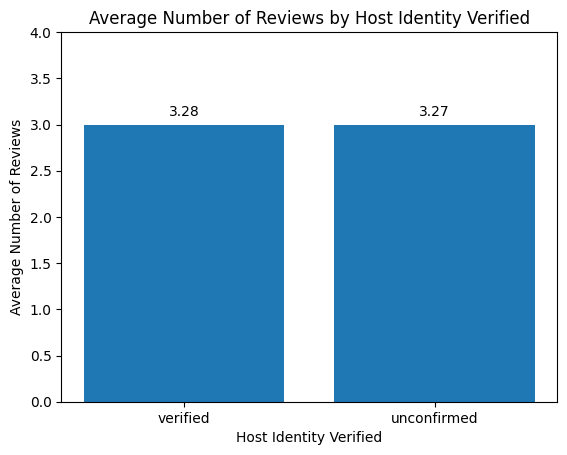

In [23]:
review_bar = plt.bar(review.index, round(review.loc[:, "review rate number"]));
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 2), padding=4);
plt.ylim(0, 4); 
plt.xlabel("Host Identity Verified");
plt.ylabel("Average Number of Reviews");
plt.title("Average Number of Reviews by Host Identity Verified");
plt.show()   

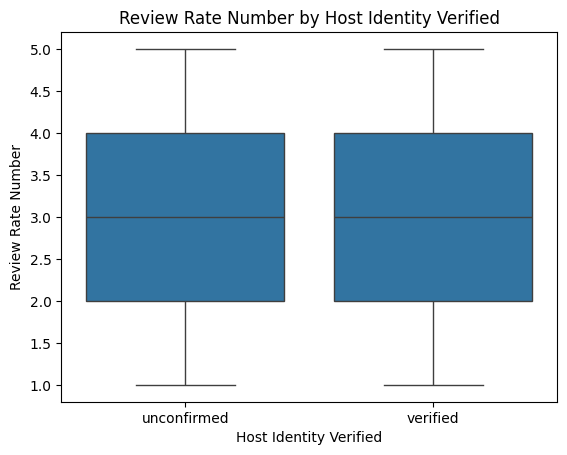

In [24]:
base_color = sns.color_palette()[0]
sns.boxplot(data=df, x = "host_identity_verified", y = "review rate number", color=base_color);
plt.xlabel("Host Identity Verified");
plt.ylabel("Review Rate Number");
plt.title("Review Rate Number by Host Identity Verified");

The Average review rate for verified and unconfirmed hosts are 3.28 and 3.27 repectively, including a marginal difference in their review rates, with verified hosts having a slightly higher rate. This suggests that unconfirmed hosts are not necessarily more likely to receive positive reviews compared to verified hosts.

### Is there a correlation between the price of a listing and its service fee?

In [25]:
#isthere a correlation between the price of a listing and its service fee?
df[['price_$', 'Service_fee_$']].corr()

,price_$,Service_fee_$
price_$,1.000000,0.999991
Service_fee_$,0.999991,1.000000


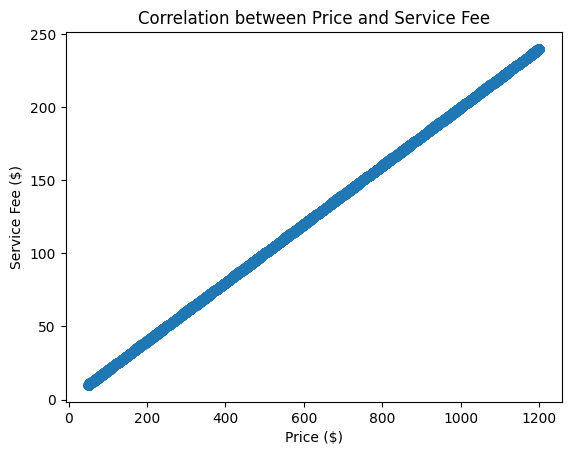

In [26]:
sns.regplot(data=df, x='price_$', y='Service_fee_$');
plt.xlabel("Price ($)");
plt.ylabel("Service Fee ($)");
plt.title("Correlation between Price and Service Fee");

The pearson correlation coeffiecient between the price and service fee is 0.99, indicating a highly robust positive correlation between these variables. On the regression plot, each point forms a rising diagonal line towards the right, signifying that as the price of property increases, so does its service fee.

### what are the average review rate number (e.g. starts) for listings, and does it vary based on the neighborhood group and room types?


In [30]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.379863
                    Private room               3.312548
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.243013
                    Hotel room                 3.833333
                    Private room               3.274774
                    Shared room                3.322368
Manhattan           Entire home/apt            3.268940
                    Hotel room                 3.500000
                    Private room               3.285628
                    Shared room                3.252976
Queens              Entire home/apt            3.347437
                    Hotel room                 3.750000
                    Private room               3.311761
                    Shared room                3.327402
Staten Island       Entire home/apt            3.334129
                    Private room               3.493671
                    Shared room                3.714286

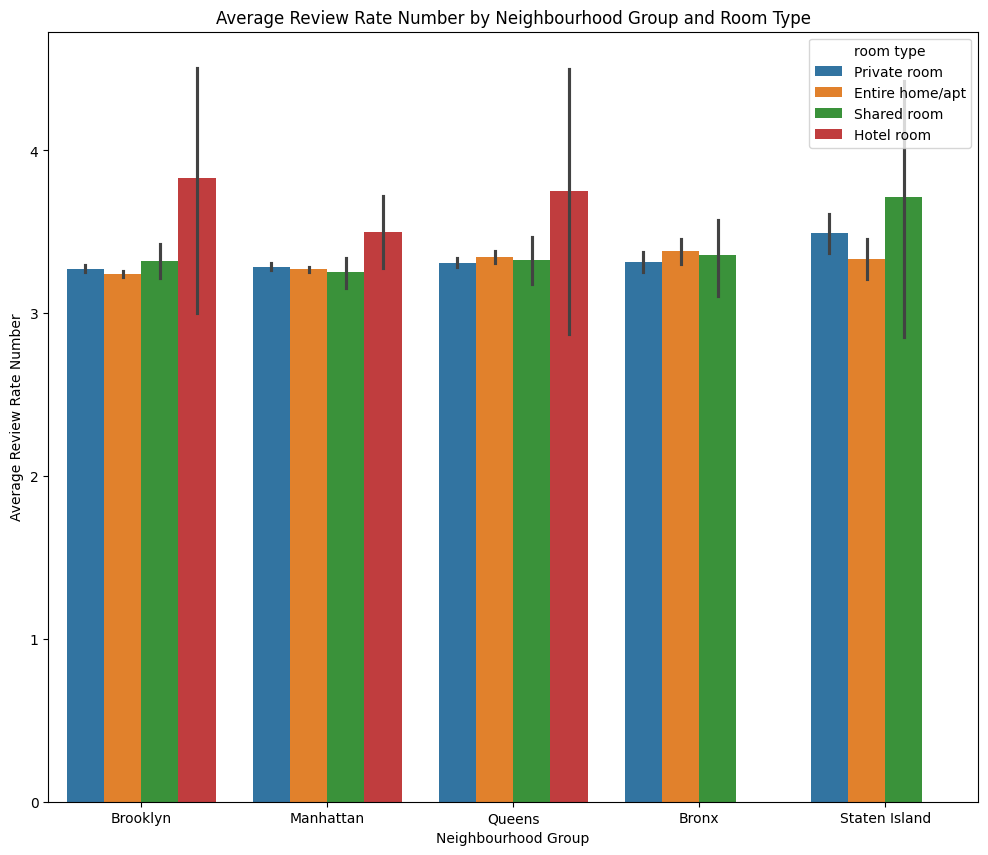

In [31]:
plt.figure(figsize=(12, 10))
sns.barplot(data=df, x='neighbourhood group', y='review rate number', hue='room type');
plt.xlabel("Neighbourhood Group");  
plt.ylabel("Average Review Rate Number");
plt.title("Average Review Rate Number by Neighbourhood Group and Room Type");

Hotel room exhibit has higher review rate compared to all other property types within the three neighborhood groups where they are located :

Brooklyn, Mahattan, and Queens.

### Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

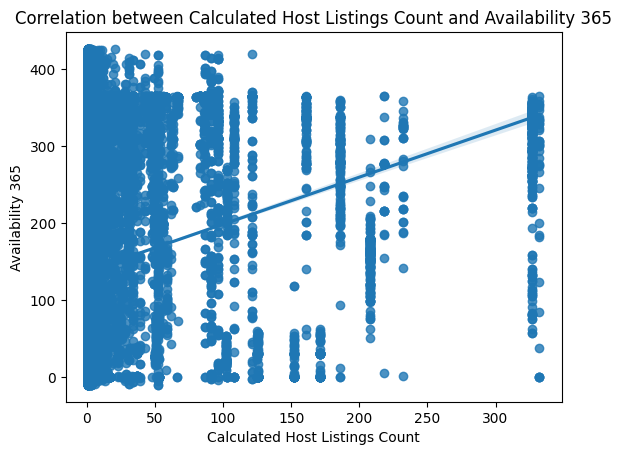

In [32]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(data=df, x='calculated host listings count', y='availability 365');
plt.xlabel("Calculated Host Listings Count");
plt.ylabel("Availability 365"); 
plt.title("Correlation between Calculated Host Listings Count and Availability 365");

In [33]:
df['calculated host listings count'].corr(df['availability 365'])

0.1353372562905426

The pearson correlation coefficient for the association between calculated host listings and availability 365 is 0.135, indicating a weak positive correlation between the two variables.

# Conclusion

In conclusion, this project has provided a comprehensive analysis of the New York City Airbnb dataset, shedding light on various aspects of the short-term rental market. The analysis encompasses exploratory data analysis, geospatial analysis, and statistical modeling, yielding several valuable insights regarding distribution, pricing dynamics, host, and review analysis.

Key findings include the heterogeneous distribution of listings across different property and existing country across neighborhood groups, and the significant influence of pricing on booking and availability rates. Furthermore, there's a need to consider the impact of host characteristics on review rates, as well as the strong correlation between listing price and review rate.

The insights derived from this project have practical implications for hosts, allowing them to develop smarter pricing and management strategies. Moreover, the dataset, when combined with predictive modeling techniques such as regression or machine learning algorithms, could enable forecasting of listing demand, pricing trends, and customer satisfaction. Further analysis could be done by incorporating real-time data to enhance accuracy.